In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("ggplot")
%matplotlib inline

In [2]:
NTP_df = pd.read_csv("DrDoS_DNS.csv", encoding='utf-8-sig')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
NTP_df.head()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,DrDoS_DNS
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [4]:
NTP_df.shape

(5074413, 88)

In [5]:
NTP_df.describe()

,Unnamed: 0,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
count,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,...,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06,5.074413e+06
mean,1.380064e+04,8.000962e+02,3.279212e+04,1.699142e+01,7.176140e+03,6.013596e+00,8.004867e-03,2.952438e+03,6.768139e+00,1.377942e+03,...,-3.680966e+07,6.703219e+01,1.305199e+01,8.437979e+01,5.788418e+01,2.331791e+03,1.054355e+02,2.420004e+03,2.240776e+03,9.990669e-01
std,8.020386e+03,1.851189e+03,1.892478e+04,3.194000e-01,7.711845e+05,5.953501e+02,2.950822e+00,9.122037e+03,6.837585e+03,2.999557e+02,...,1.943476e+08,2.653840e+04,6.162152e+03,2.883959e+04,2.557915e+04,3.318188e+05,4.571781e+04,3.434160e+05,3.242934e+05,3.053264e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.408238e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.844000e+03,5.810000e+02,1.643000e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,2.928000e+03,0.000000e+00,1.464000e+03,...,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.377600e+04,7.270000e+02,3.279400e+04,1.700000e+01,1.000000e+00,2.000000e+00,0.000000e+00,2.944000e+03,0.000000e+00,1.472000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.074100e+04,8.750000e+02,4.918300e+04,1.700000e+01,2.000000e+00,2.000000e+00,0.000000e+00,2.944000e+03,0.000000e+00,1.472000e+03,...,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,2.818200e+04,6.550800e+04,6.553500e+04,1.700000e+01,1.200000e+08,1.001480e+05,4.602000e+03,1.526642e+07,1.099376e+07,3.212000e+04,...,1.480000e+03,4.872242e+07,7.827056e+06,4.872242e+07,4.872242e+07,1.017888e+08,6.600292e+07,1.037700e+08,1.017888e+08,1.000000e+00


In [6]:
NTP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5074413 entries, 0 to 5074412
Data columns (total 88 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0                    int64  
 1   Flow ID                       object 
 2    Source IP                    object 
 3    Source Port                  int64  
 4    Destination IP               object 
 5    Destination Port             int64  
 6    Protocol                     int64  
 7    Timestamp                    object 
 8    Flow Duration                int64  
 9    Total Fwd Packets            int64  
 10   Total Backward Packets       int64  
 11  Total Length of Fwd Packets   float64
 12   Total Length of Bwd Packets  float64
 13   Fwd Packet Length Max        float64
 14   Fwd Packet Length Min        float64
 15   Fwd Packet Length Mean       float64
 16   Fwd Packet Length Std        float64
 17  Bwd Packet Length Max         float64
 18   Bwd Packet Length Min

In [7]:
NTP_df.isnull()

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074408,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5074409,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5074410,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5074411,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


We import missingo to see null values for 20 features 

[<AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>,
 <AxesSubplot:>]

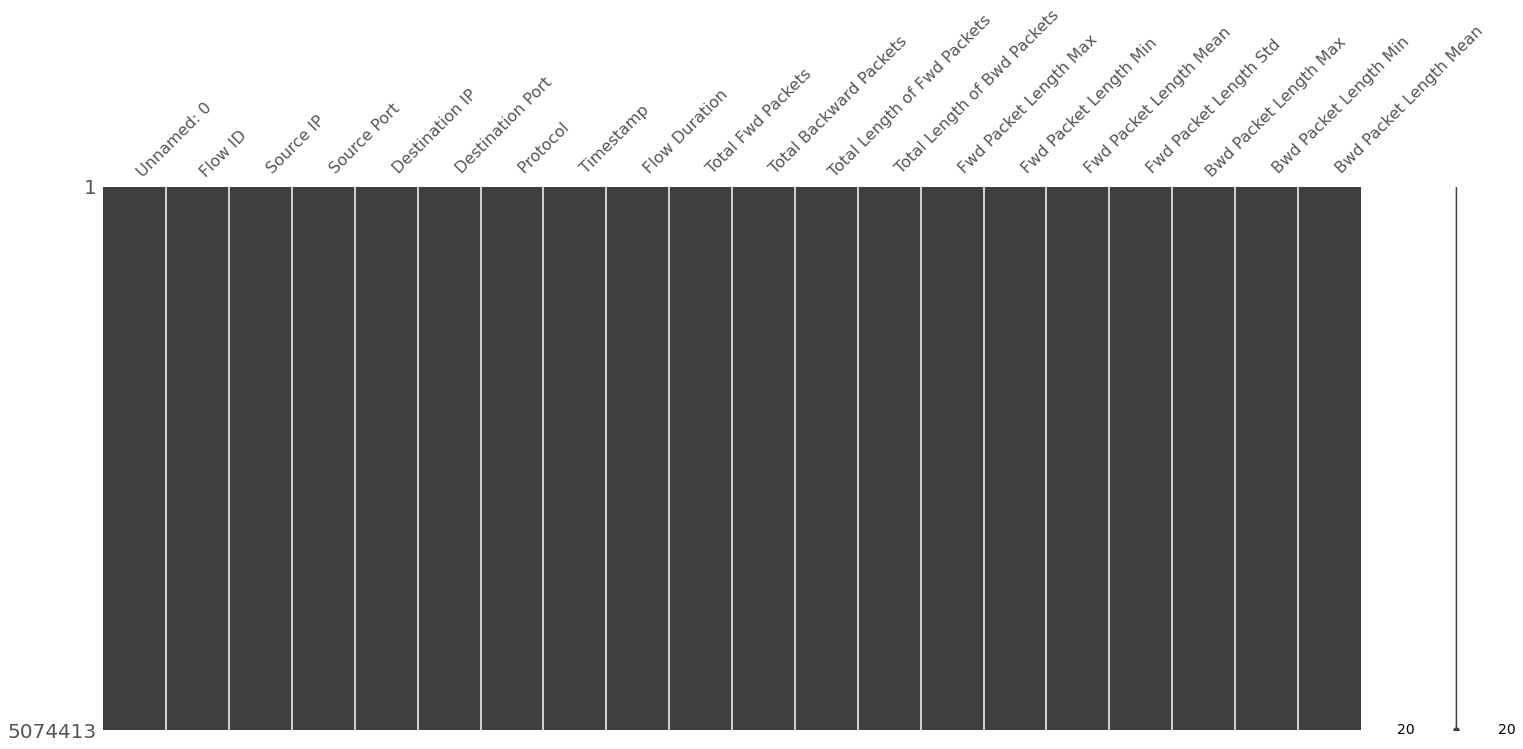

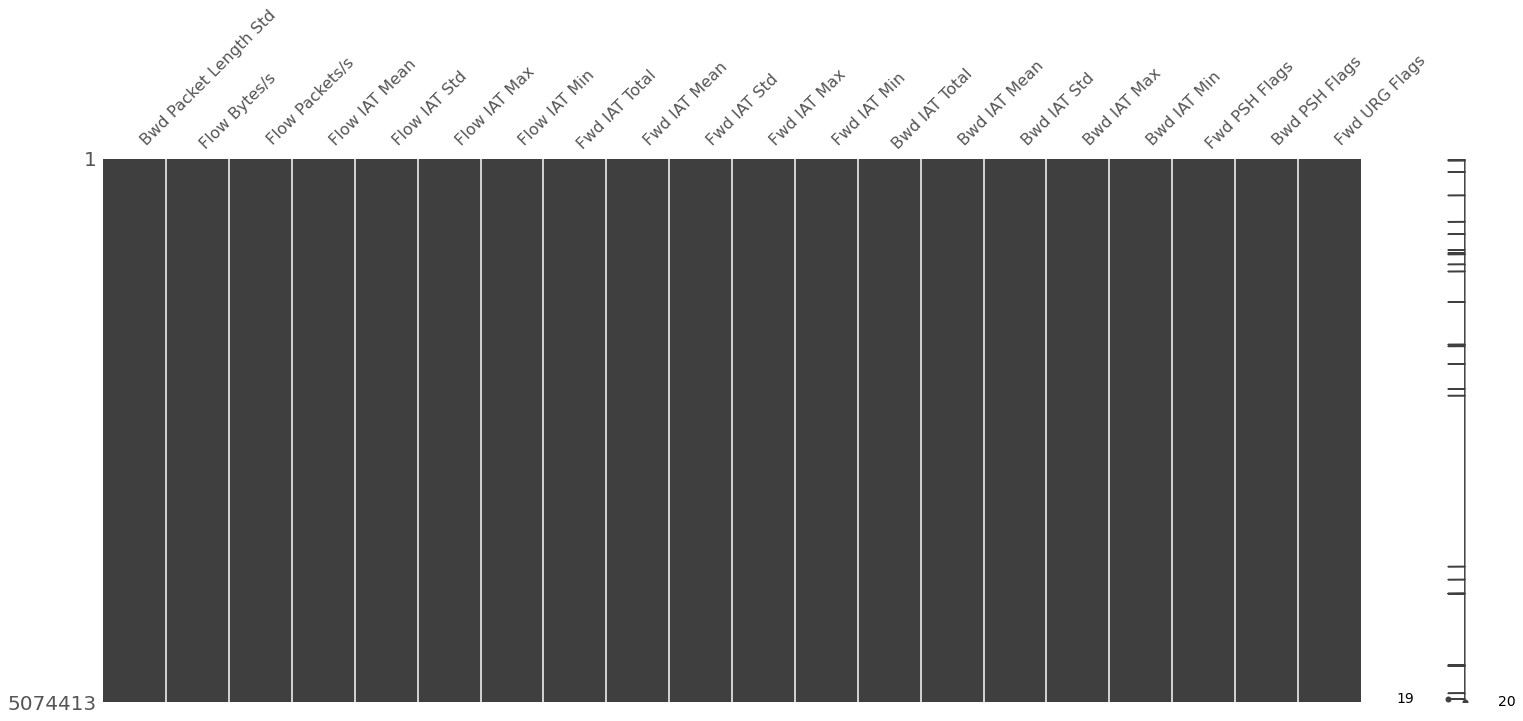

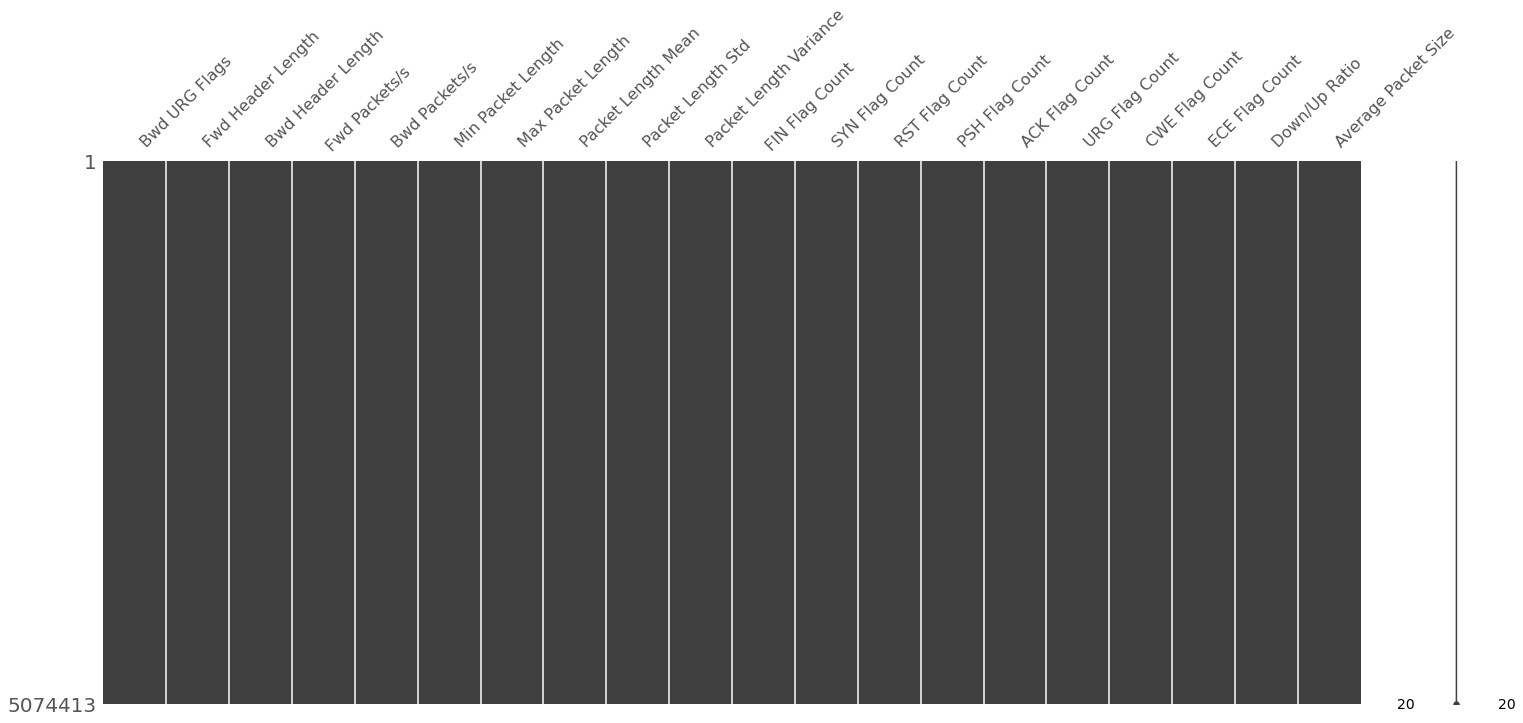

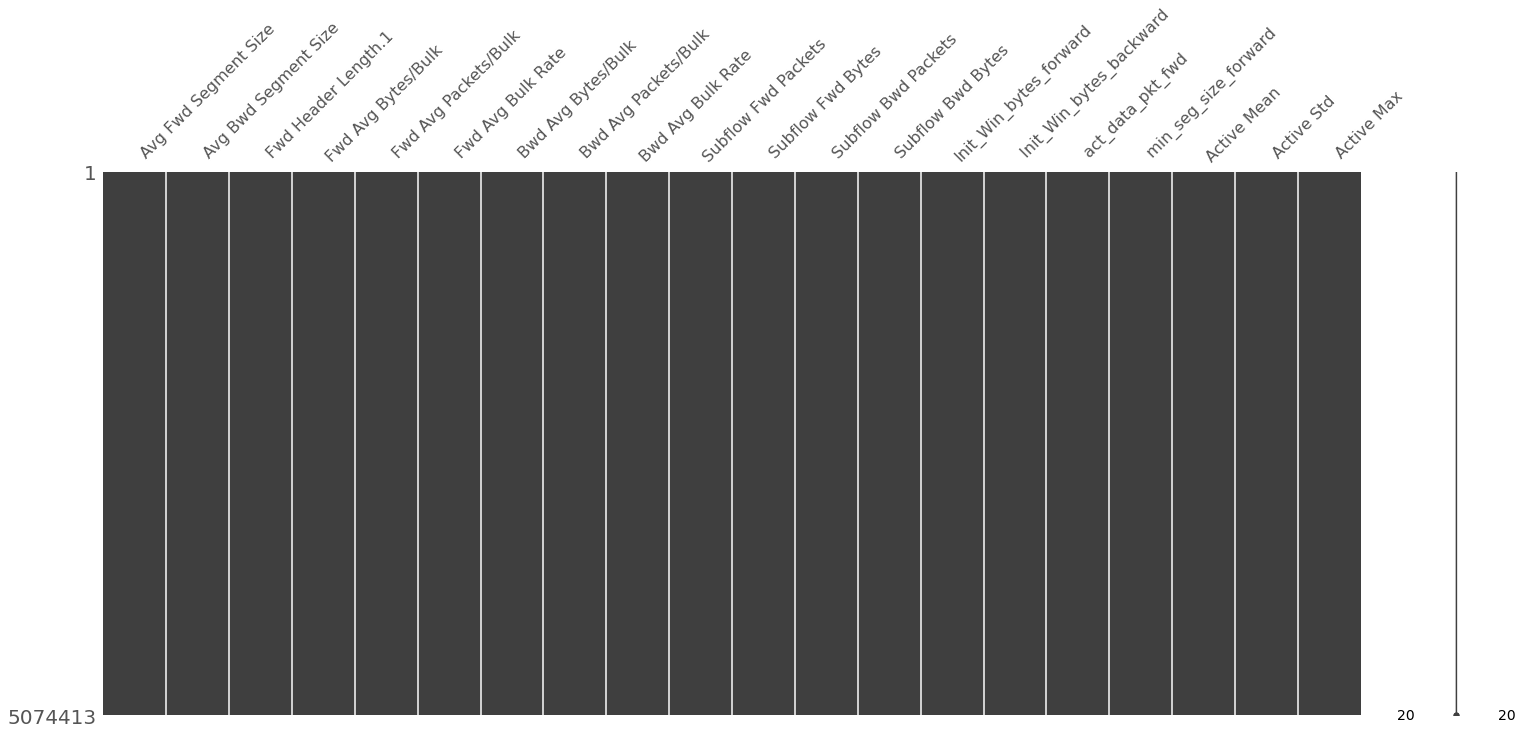

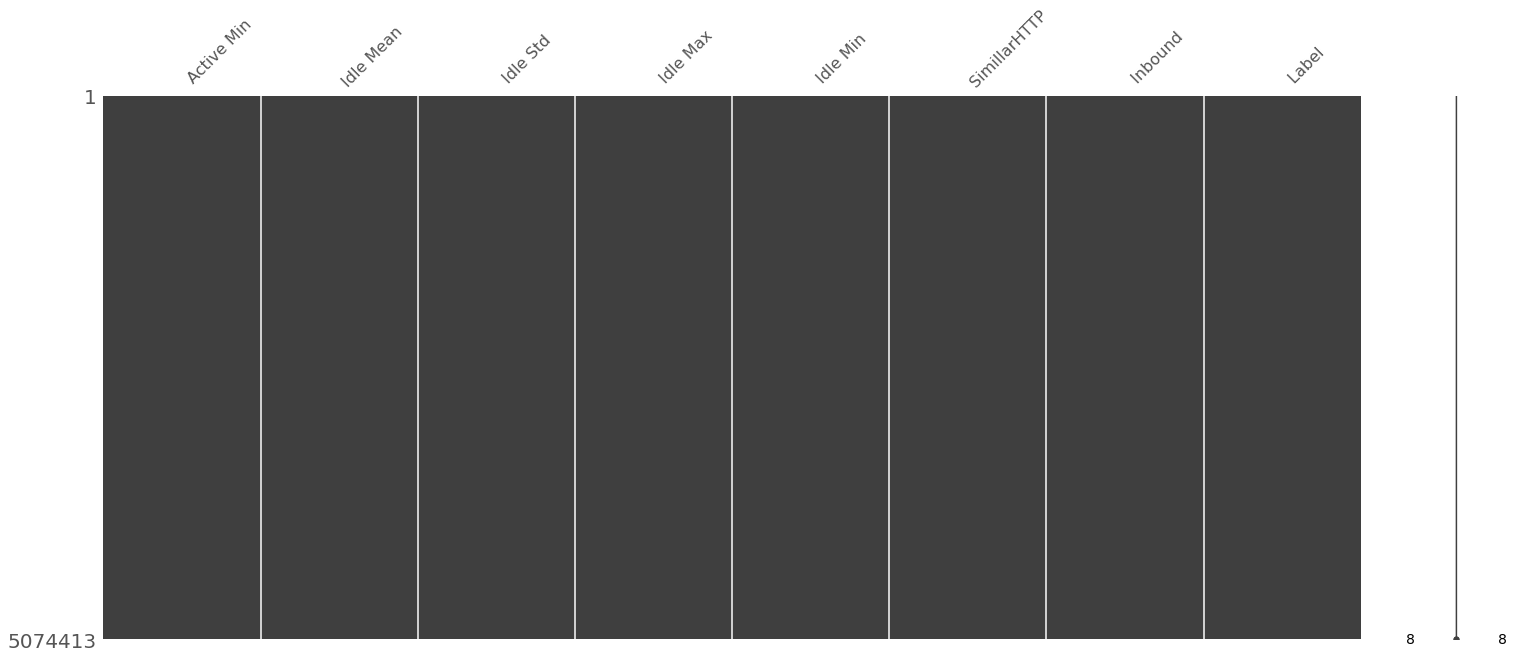

In [8]:
import missingno as msno
[msno.matrix(NTP_df.iloc[: , n:n+20]) for n in list(range(0,len(NTP_df.columns),20))]

We have one column with null values

In [9]:
[NTP_df.iloc[: , n:n+20].isnull().sum() for n in list(range(0,len(NTP_df.columns),20))]

[Unnamed: 0                      0
 Flow ID                         0
  Source IP                      0
  Source Port                    0
  Destination IP                 0
  Destination Port               0
  Protocol                       0
  Timestamp                      0
  Flow Duration                  0
  Total Fwd Packets              0
  Total Backward Packets         0
 Total Length of Fwd Packets     0
  Total Length of Bwd Packets    0
  Fwd Packet Length Max          0
  Fwd Packet Length Min          0
  Fwd Packet Length Mean         0
  Fwd Packet Length Std          0
 Bwd Packet Length Max           0
  Bwd Packet Length Min          0
  Bwd Packet Length Mean         0
 dtype: int64,  Bwd Packet Length Std     0
 Flow Bytes/s              31
  Flow Packets/s            0
  Flow IAT Mean             0
  Flow IAT Std              0
  Flow IAT Max              0
  Flow IAT Min              0
 Fwd IAT Total              0
  Fwd IAT Mean              0
  Fwd IAT Std   

In [10]:
s = NTP_df.head(50)['Flow Bytes/s']/NTP_df.head(50)[' Flow Packets/s']
s

0     440.000000
1     440.000000
2     440.000000
3     440.000000
4     440.000000
5     440.000000
6     440.000000
7     440.000000
8     440.000000
9     440.000000
10    440.000000
11    440.000000
12    440.000000
13    440.000000
14    440.000000
15    440.000000
16    440.000000
17      0.000000
18    440.000000
19    440.000000
20    440.000000
21    440.000000
22     49.882353
23    440.000000
24    440.000000
25    440.000000
26    440.000000
27     26.615385
28    440.000000
29    440.000000
30    440.000000
31      3.684211
32    440.000000
33    440.000000
34    440.000000
35    440.000000
36    440.000000
37    440.000000
38    440.000000
39    440.000000
40    440.000000
41    440.000000
42    440.000000
43    440.000000
44    440.000000
45    440.000000
46    440.000000
47    440.000000
48    440.000000
49    440.000000
dtype: float64

It turns out we are dealing with infinate value in the column Flow Packets and we will address that

In [11]:
NTP_df['Flow Bytes/s'].fillna(NTP_df[' Flow Packets/s']*440, inplace=True)
NTP_df.isna().sum().sum()

0

In [12]:
print(NTP_df.columns.tolist())

['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN

In [13]:
target = NTP_df[' Label'][:].values
from collections import Counter
Counter(target)

Counter({'DrDoS_DNS': 5071011, 'BENIGN': 3402})

We have imbalanced data and that will be addressed later but first we are working in fixing the finite values and null values

In [14]:
str(((target == 'BENIGN').sum()/len(target))*100)+"%"

'0.06704223720063779%'

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
NTP_df[' Label'].replace('BENIGN', 0, inplace=True)

In [17]:
NTP_df[' Label'].replace('DrDoS_DNS', 1, inplace=True)

In [18]:
NTP_df[' Label'].value_counts()

1    5071011
0       3402
Name:  Label, dtype: int64

In [19]:
encodings=[x for x in NTP_df.columns if NTP_df[x].dtype=="object"]

le=LabelEncoder()

for col in encodings:
    if col in NTP_df.columns:
        i = NTP_df.columns.get_loc(col)
        NTP_df.iloc[:,i] = NTP_df.apply(lambda i:le.fit_transform(i.astype(str)), axis=0, result_type='expand')

In [20]:
NTP_df.replace(np.inf, np.nan, inplace=True)

In [21]:
NTP_df.columns

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

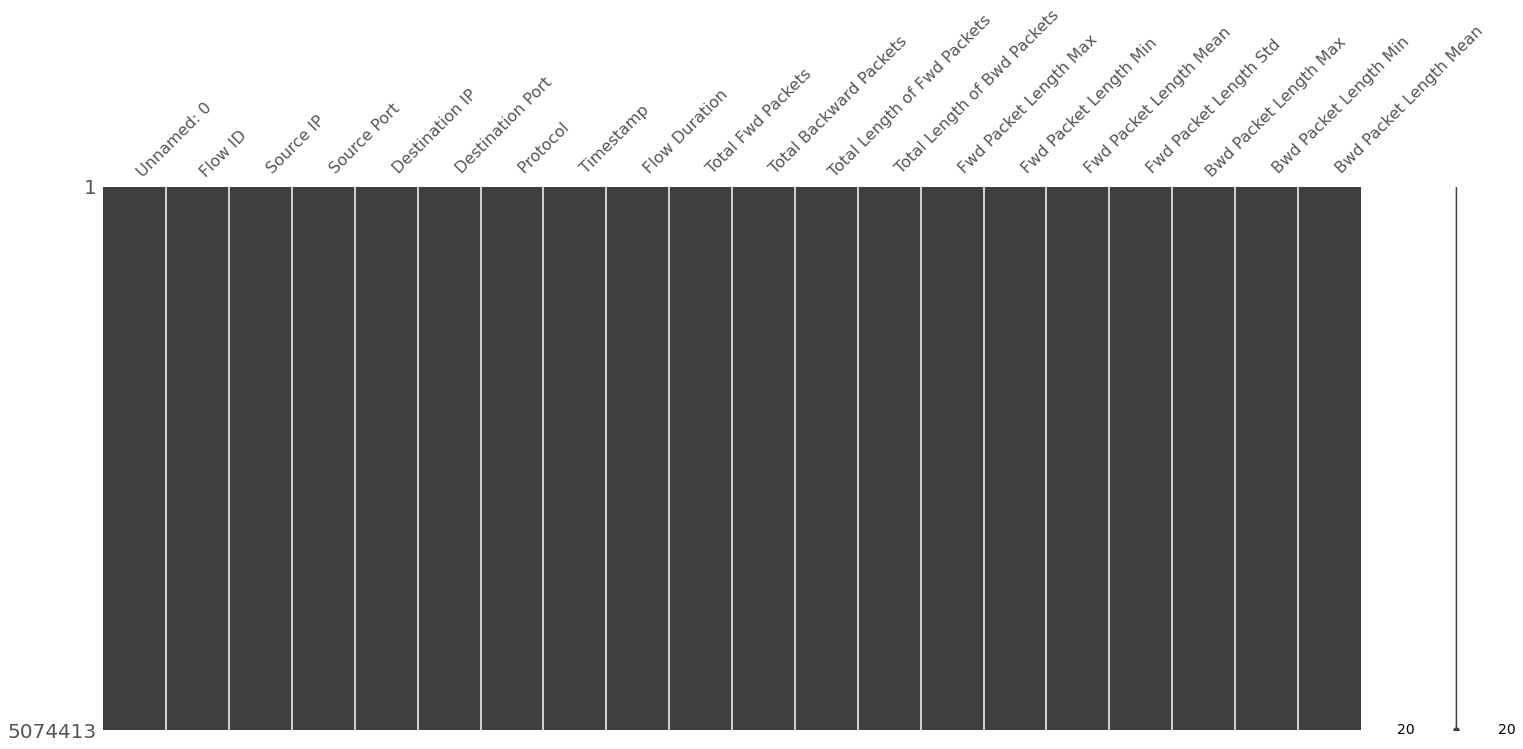

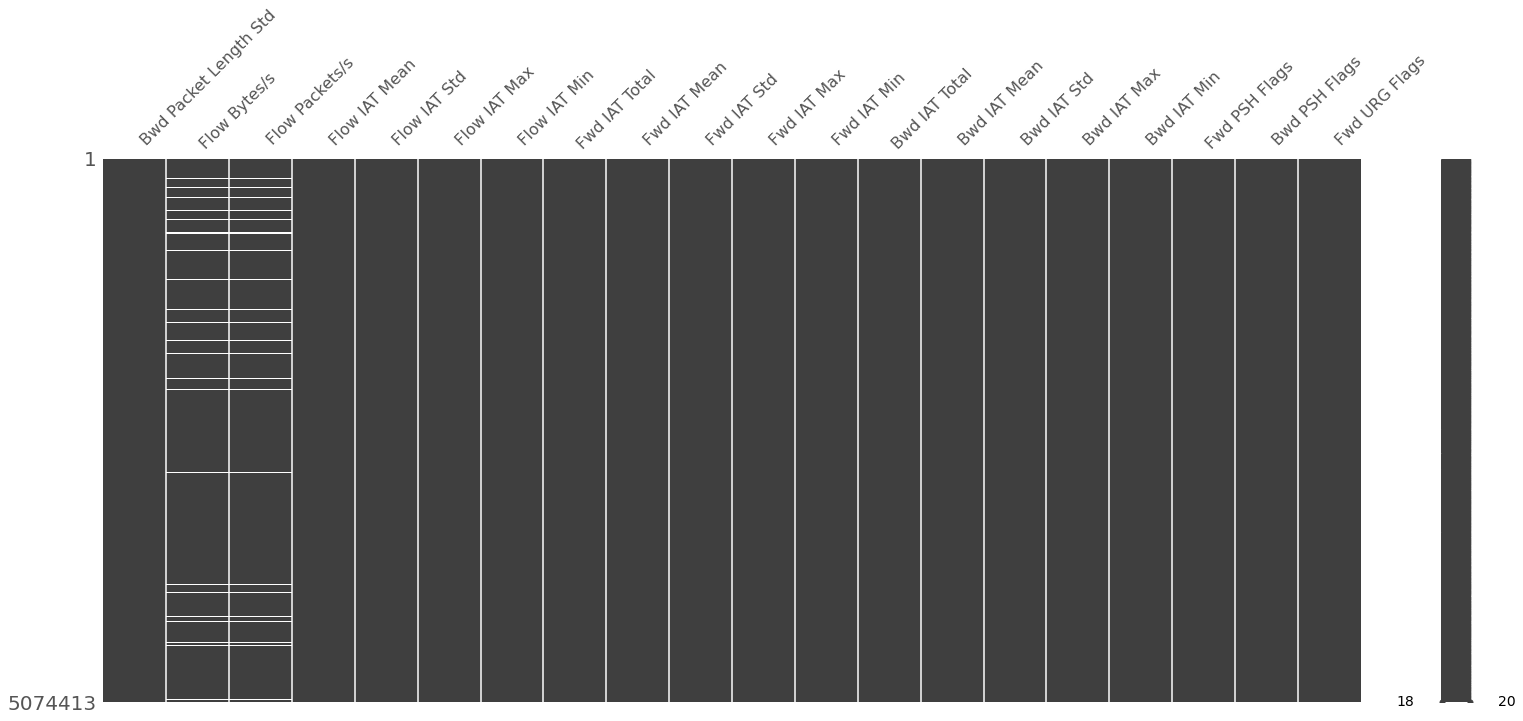

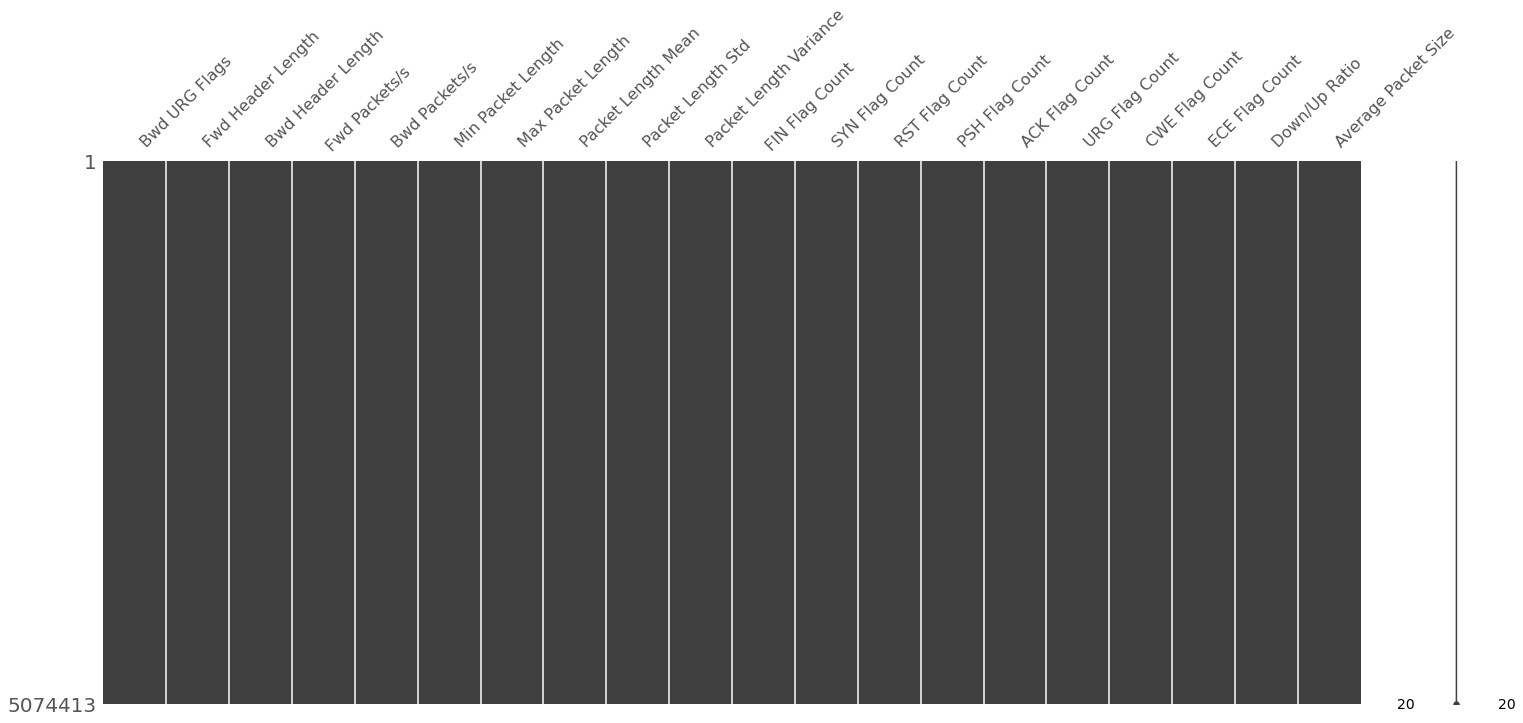

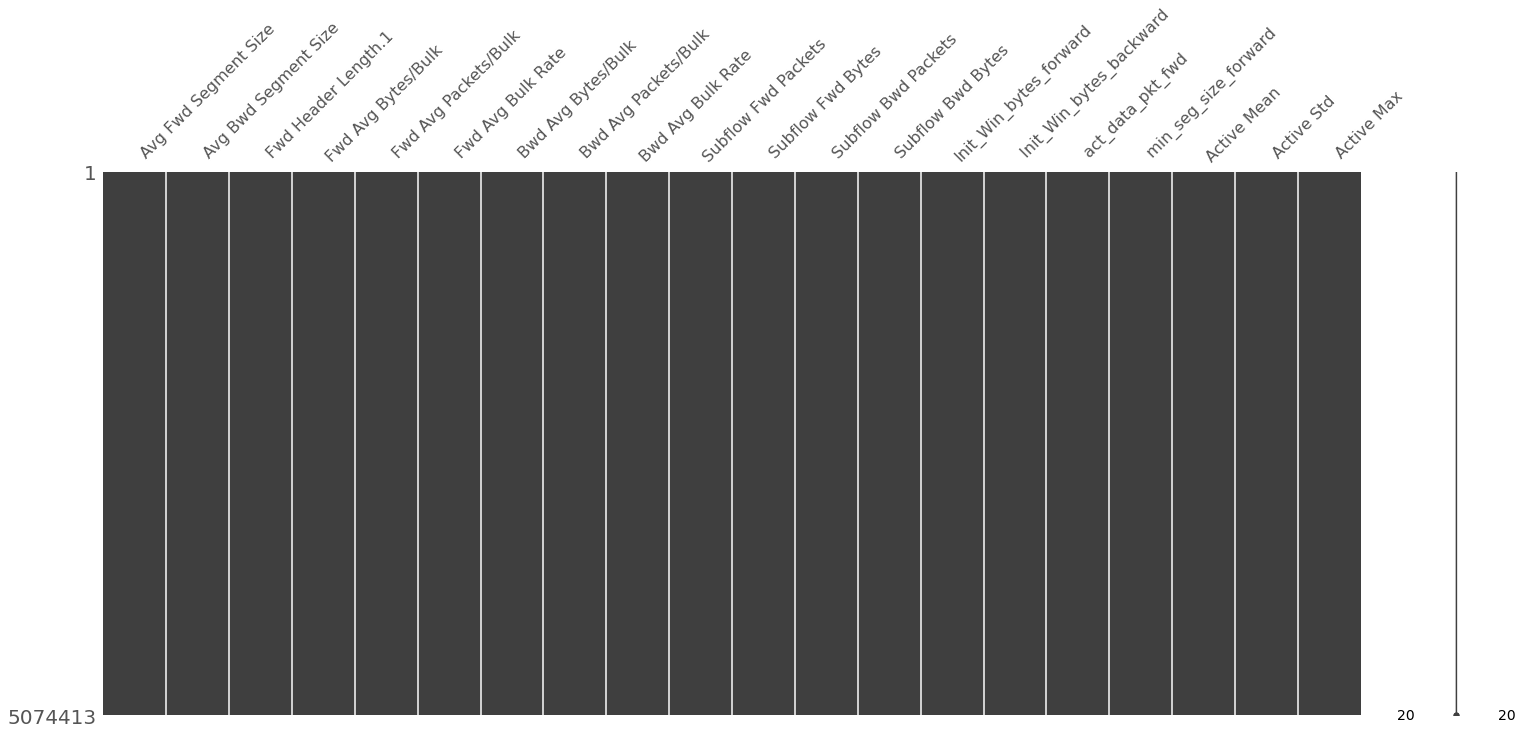

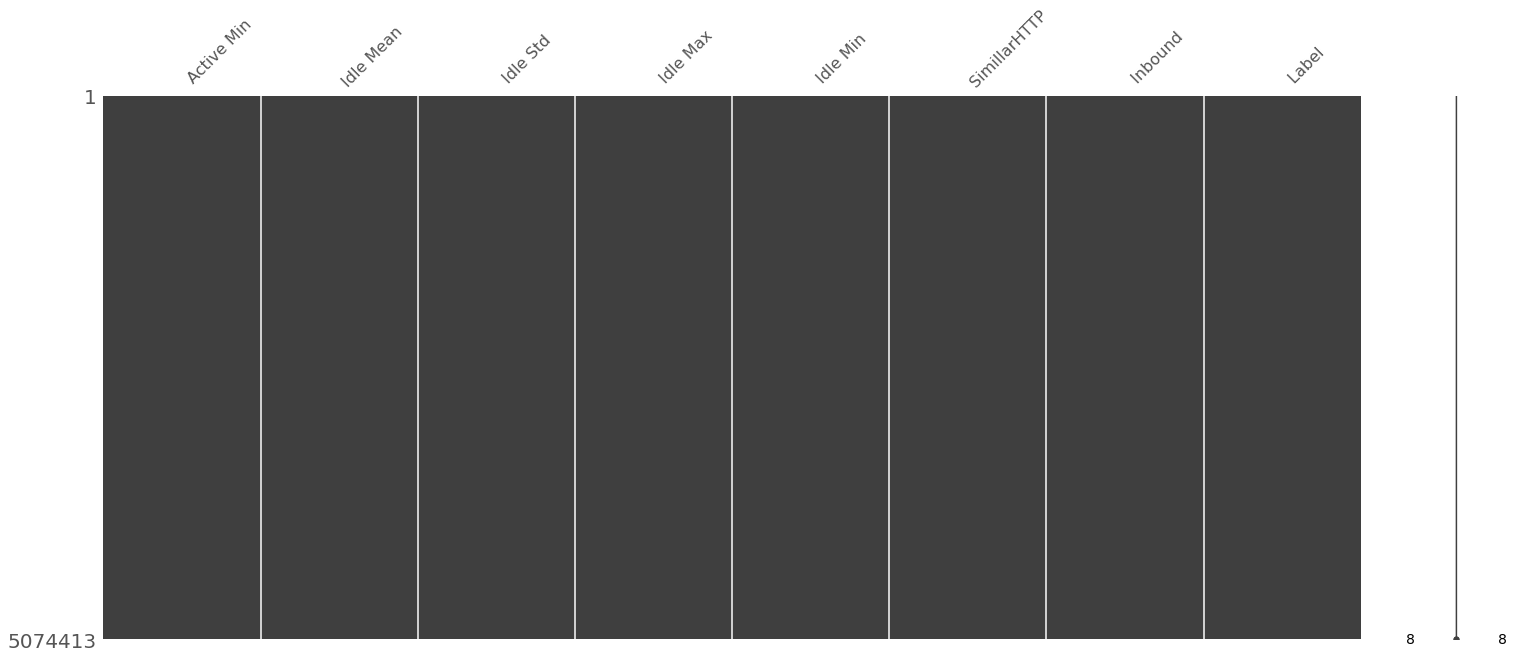

In [22]:
import missingno as msno
[msno.matrix(NTP_df.iloc[: , n:n+20]) for n in list(range(0,len(NTP_df.columns),20))];

In [23]:
[NTP_df.iloc[: , n:n+20].isnull().sum() for n in list(range(0,len(NTP_df.columns),20))]

[Unnamed: 0                      0
 Flow ID                         0
  Source IP                      0
  Source Port                    0
  Destination IP                 0
  Destination Port               0
  Protocol                       0
  Timestamp                      0
  Flow Duration                  0
  Total Fwd Packets              0
  Total Backward Packets         0
 Total Length of Fwd Packets     0
  Total Length of Bwd Packets    0
  Fwd Packet Length Max          0
  Fwd Packet Length Min          0
  Fwd Packet Length Mean         0
  Fwd Packet Length Std          0
 Bwd Packet Length Max           0
  Bwd Packet Length Min          0
  Bwd Packet Length Mean         0
 dtype: int64,  Bwd Packet Length Std         0
 Flow Bytes/s              162394
  Flow Packets/s           162394
  Flow IAT Mean                 0
  Flow IAT Std                  0
  Flow IAT Max                  0
  Flow IAT Min                  0
 Fwd IAT Total                  0
  Fwd IAT Mean

In [24]:
[NTP_df.iloc[: , n:n+20].isnull().sum() for n in list(range(0,len(NTP_df.columns),20))]

[Unnamed: 0                      0
 Flow ID                         0
  Source IP                      0
  Source Port                    0
  Destination IP                 0
  Destination Port               0
  Protocol                       0
  Timestamp                      0
  Flow Duration                  0
  Total Fwd Packets              0
  Total Backward Packets         0
 Total Length of Fwd Packets     0
  Total Length of Bwd Packets    0
  Fwd Packet Length Max          0
  Fwd Packet Length Min          0
  Fwd Packet Length Mean         0
  Fwd Packet Length Std          0
 Bwd Packet Length Max           0
  Bwd Packet Length Min          0
  Bwd Packet Length Mean         0
 dtype: int64,  Bwd Packet Length Std         0
 Flow Bytes/s              162394
  Flow Packets/s           162394
  Flow IAT Mean                 0
  Flow IAT Std                  0
  Flow IAT Max                  0
  Flow IAT Min                  0
 Fwd IAT Total                  0
  Fwd IAT Mean

In [25]:
NTP_df['Flow Bytes/s'].replace(np.nan, np.max(NTP_df['Flow Bytes/s']), inplace=True)
NTP_df[' Flow Packets/s'].replace(np.nan, np.max(NTP_df[' Flow Packets/s']), inplace=True)

In [26]:
NTP_df.to_csv('df_NTP_clean.csv', encoding='utf-8')